In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot
from sklearn.feature_selection import VarianceThreshold
plt.style.use('fivethirtyeight')
from scipy import stats

In [2]:
train = pd.read_csv('G:/Desktop/datasets/flight-delays-spring-2018/flight_delays_train.csv')
test = pd.read_csv('G:/Desktop/datasets/flight-delays-spring-2018/flight_delays_test.csv')

In [3]:
train.shape

(100000, 9)

## concatenate two dataframes

In [3]:
data = pd.concat([train,test])

C:\Users\Dindar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


## our target('dep_delayed_15min')

### count of each values

In [4]:
d = {'N':0, 'Y':1}
data['dep_delayed_15min'] = data['dep_delayed_15min'].map(d)

0.0    0.80956
1.0    0.19044
Name: dep_delayed_15min, dtype: float64


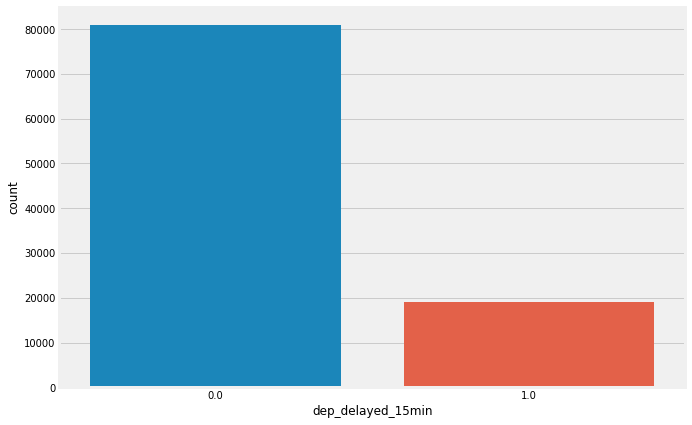

In [6]:
print(data['dep_delayed_15min'].value_counts(normalize=True))
plt.figure(figsize=(10, 7))
sns.countplot(data['dep_delayed_15min'])

## day of week

In [7]:
d = {'c-7':7, 'c-3':3, 'c-5':5, 'c-6':6, 'c-4':4, 'c-2':2, 'c-1':1}
data['DayOfWeek'] = data['DayOfWeek'].map(d)

In [8]:
pmf = thinkstats2.Pmf(data['DayOfWeek'])

In [9]:
pmf

Pmf({1: 0.14793, 5: 0.14770000000000003, 4: 0.14769000000000002, 3: 0.145405, 2: 0.14471, 7: 0.13994, 6: 0.12662500000000002})

In [10]:
pmf.Total()

1.0

In [11]:
pmf.Prob(4)

0.14769000000000002

### probability of flight of each week days

No handles with labels found to put in legend.


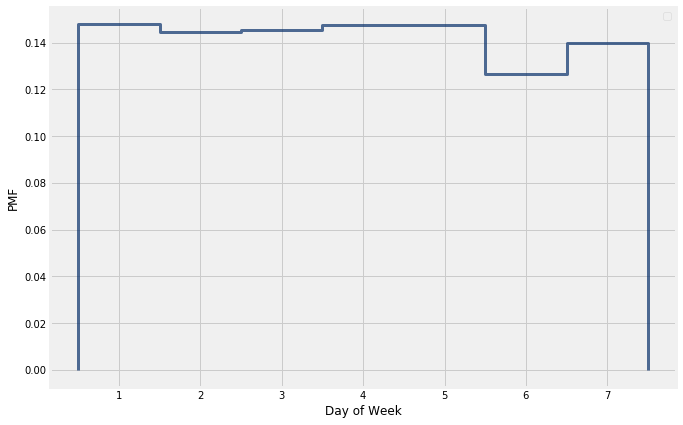

<Figure size 576x432 with 0 Axes>

In [12]:
plt.figure(figsize=(10, 7))
thinkplot.Pmf(pmf)
thinkplot.Show(xlabel='Day of Week', ylabel='PMF')

In [13]:
yes_pmf = thinkstats2.Pmf(data[data['dep_delayed_15min'] == 1.0]['DayOfWeek'], label='1')
no_pmf = thinkstats2.Pmf(data[data['dep_delayed_15min'] == 0.0]['DayOfWeek'],  label='0')

pmf of weekdays of delays and non-delays flights

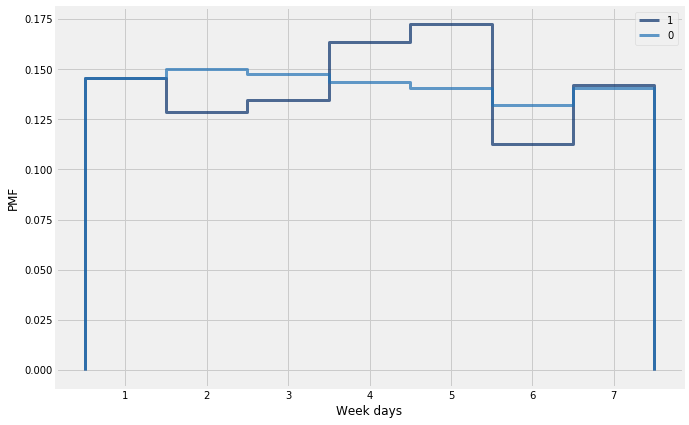

<Figure size 576x432 with 0 Axes>

In [14]:
plt.figure(figsize=(10, 7))
thinkplot.Pmfs([yes_pmf, no_pmf])
thinkplot.Show(xlabel='Week days', ylabel='PMF')

C:\Users\Dindar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Dindar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x648 with 0 Axes>

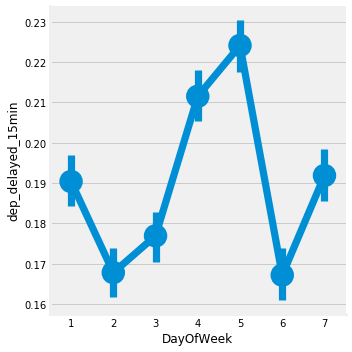

In [15]:
plt.figure(figsize=(12, 9))
sns.factorplot('DayOfWeek', 'dep_delayed_15min', data=data)

### day of month

In [16]:
d = {'c-21':21, 'c-20':20, 'c-2':2, 'c-25':25, 'c-7':7, 'c-3':3, 'c-27':27, 'c-29':29,
       'c-28':28, 'c-5':5, 'c-6':6, 'c-10':10, 'c-19':19, 'c-26':26, 'c-14':14, 'c-22':22,
       'c-9':9, 'c-31':31, 'c-4':4, 'c-16':16, 'c-18':18, 'c-30':30, 'c-1':1, 'c-24':24,
       'c-15':15, 'c-17':17, 'c-8':8, 'c-12':12, 'c-13':13, 'c-11':11, 'c-23':23}
data['DayofMonth'] = data['DayofMonth'].map(d)

In [17]:
pmf1 = thinkstats2.Pmf(data['DayofMonth'])

No handles with labels found to put in legend.


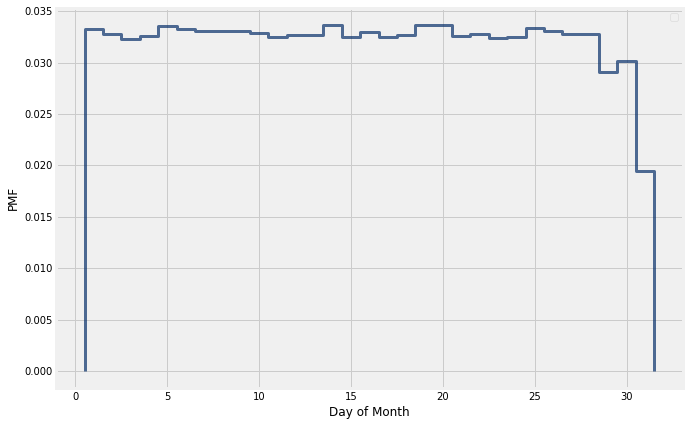

<Figure size 576x432 with 0 Axes>

In [18]:
plt.figure(figsize=(10, 7))
thinkplot.Pmf(pmf1)
thinkplot.Show(xlabel='Day of Month', ylabel='PMF')

### pmf of DayofMonth of all flights

In [19]:
pmf1 = thinkstats2.Pmf(data['DayofMonth'])

No handles with labels found to put in legend.


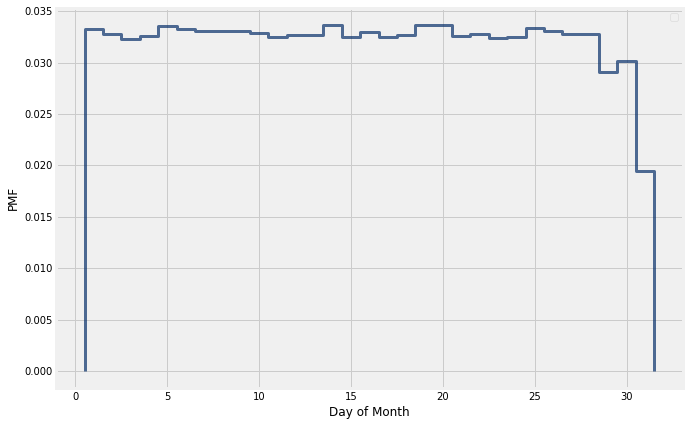

<Figure size 576x432 with 0 Axes>

In [20]:
plt.figure(figsize=(10, 7))
thinkplot.Pmf(pmf1)
thinkplot.Show(xlabel='Day of Month', ylabel='PMF')

### cdf of DayofMonth of delays and non-delays flights

In [21]:
yes_pmf = thinkstats2.Pmf(data[data['dep_delayed_15min'] == 1.0]['DayofMonth'], label='1')
no_pmf = thinkstats2.Pmf(data[data['dep_delayed_15min'] == 0.0]['DayofMonth'],  label='0')

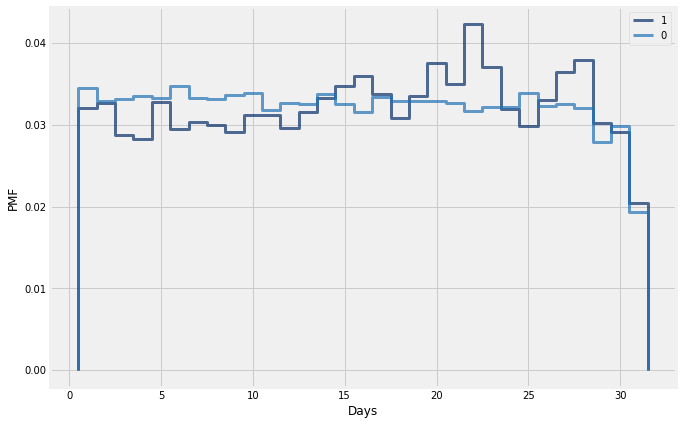

<Figure size 576x432 with 0 Axes>

In [22]:
plt.figure(figsize=(10, 7))
thinkplot.Pmfs([yes_pmf, no_pmf])
thinkplot.Show(xlabel='Days', ylabel='PMF')

In [23]:
data.loc[(data['DepTime'] > 2361)&(data['DepTime'] < 2461),'DepTime'] = 59
data.loc[(data['DepTime'] > 2461)&(data['DepTime'] < 2561),'DepTime'] = 159

In [24]:
data['depTime']=0
data.loc[data['DepTime']<=61,'depTime']=1
data.loc[(data['DepTime']>61)&(data['DepTime']<=161),'depTime']=2
data.loc[(data['DepTime']>161)&(data['DepTime']<261),'depTime']=3
data.loc[(data['DepTime']>261)&(data['DepTime']<=361),'depTime']=4
data.loc[(data['DepTime']>361)&(data['DepTime']<=461),'depTime']=5
data.loc[(data['DepTime']>461)&(data['DepTime']<=561),'depTime']=6
data.loc[(data['DepTime']>561)&(data['DepTime']<=661),'depTime']=7
data.loc[(data['DepTime']>661)&(data['DepTime']<=761),'depTime']=8
data.loc[(data['DepTime']>761)&(data['DepTime']<=861),'depTime']=9
data.loc[(data['DepTime']>861)&(data['DepTime']<=961),'depTime']=10
data.loc[(data['DepTime']>961)&(data['DepTime']<=1061),'depTime']=11
data.loc[(data['DepTime']>1061)&(data['DepTime']<=1161),'depTime']=12
data.loc[(data['DepTime']>1161)&(data['DepTime']<=1261),'depTime']=13
data.loc[(data['DepTime']>1261)&(data['DepTime']<=1361),'depTime']=14
data.loc[(data['DepTime']>1361)&(data['DepTime']<=1461),'depTime']=15
data.loc[(data['DepTime']>1461)&(data['DepTime']<=1561),'depTime']=16
data.loc[(data['DepTime']>1561)&(data['DepTime']<=1661),'depTime']=17
data.loc[(data['DepTime']>1661)&(data['DepTime']<=1761),'depTime']=18
data.loc[(data['DepTime']>1761)&(data['DepTime']<=1861),'depTime']=19
data.loc[(data['DepTime']>1861)&(data['DepTime']<=1961),'depTime']=20
data.loc[(data['DepTime']>1961)&(data['DepTime']<=2061),'depTime']=21
data.loc[(data['DepTime']>2061)&(data['DepTime']<=2161),'depTime']=22
data.loc[(data['DepTime']>2161)&(data['DepTime']<=2261),'depTime']=23
data.loc[(data['DepTime']>2261)&(data['DepTime']<=2361),'depTime']=24

### pmf of depTime of all flights

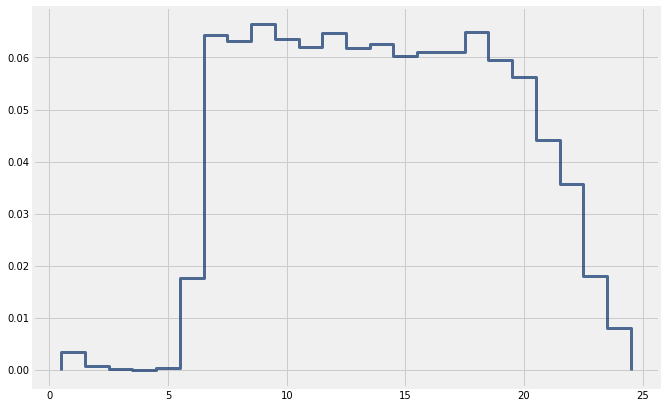

In [25]:
plt.figure(figsize=(10, 7))
pmf = thinkstats2.Pmf(data['depTime'])
thinkplot.Pmf(pmf)

In [26]:
yes_pmf = thinkstats2.Pmf(data[data['dep_delayed_15min'] == 1.0]['depTime'], label='1')
no_pmf = thinkstats2.Pmf(data[data['dep_delayed_15min'] == 0.0]['depTime'],  label='0')

### pmfs of depTime of delays and non-delays flights

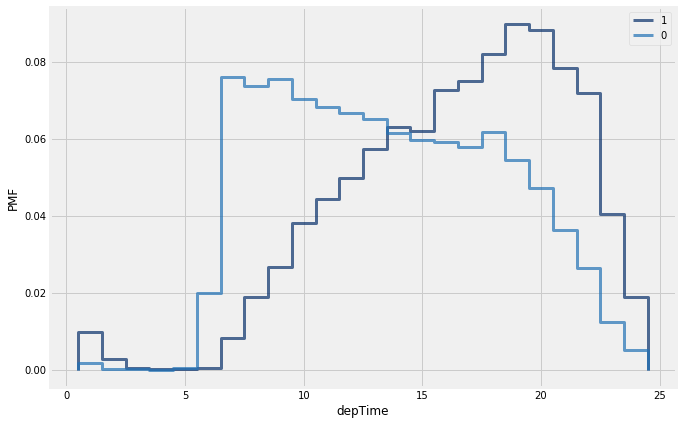

<Figure size 576x432 with 0 Axes>

In [27]:
plt.figure(figsize=(10, 7))
thinkplot.Pmfs([yes_pmf, no_pmf])
thinkplot.Show(xlabel='depTime', ylabel='PMF')

## distance

{'xscale': 'linear', 'yscale': 'linear'}

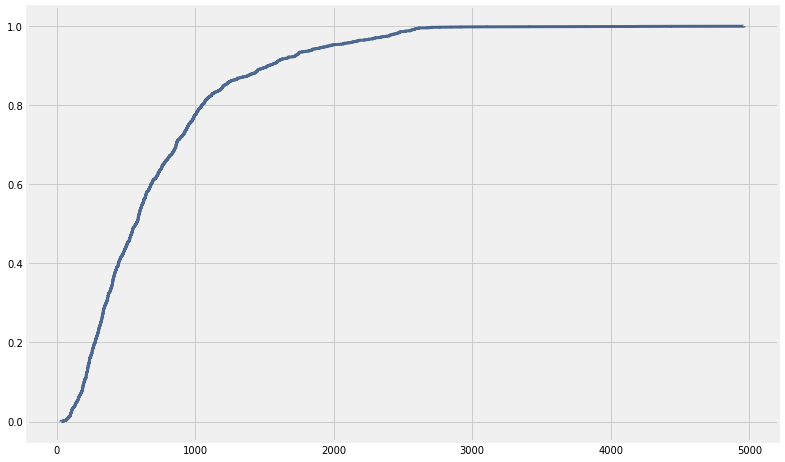

In [28]:
plt.figure(figsize=(12, 8))
thinkplot.Cdf(thinkstats2.Cdf(data['Distance']))

In [29]:
yes_cdf = thinkstats2.Cdf(data[data['dep_delayed_15min'] == 1.0]['Distance'], label='1')
no_cdf = thinkstats2.Cdf(data[data['dep_delayed_15min'] == 0.0]['Distance'],  label='0')

In [30]:
yes_cdf.Prob(2000)

0.9602499474900231

In [31]:
yes_cdf.Value(0.5)

589

### cdf of distance of delays and non-delays flights 

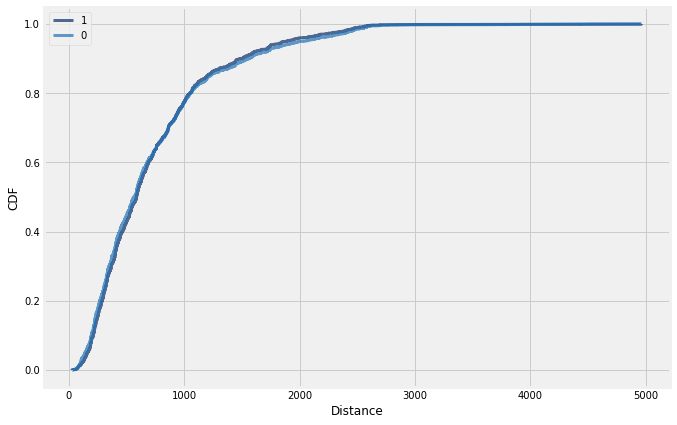

<Figure size 576x432 with 0 Axes>

In [32]:
plt.figure(figsize=(10, 7))
thinkplot.Cdfs([yes_cdf, no_cdf])
thinkplot.Show(xlabel='Distance', ylabel='CDF')

### UniqueCarrier unique value counts by ordering

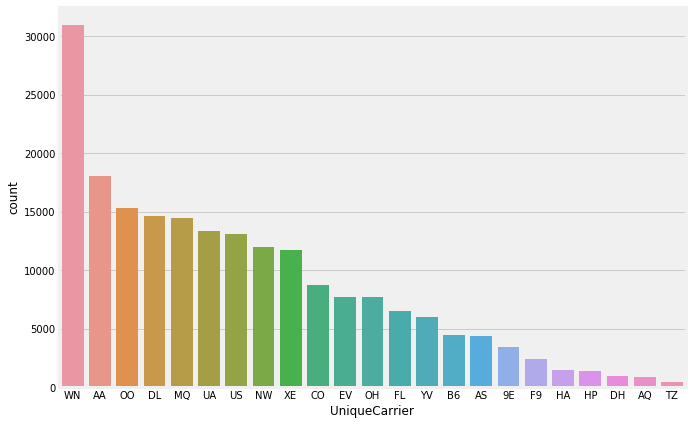

In [33]:
plt.figure(figsize=(10, 7))
sns.countplot(x='UniqueCarrier', data=data, order=data['UniqueCarrier'].value_counts().index)

### UniqueCarrier unique value counts by ordering (dividing by dep_delayed_15min)

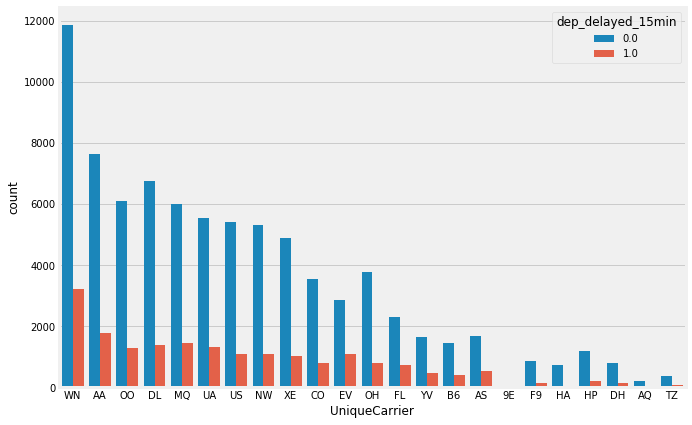

In [34]:
plt.figure(figsize=(10, 7))
sns.countplot(x='UniqueCarrier', data=data, hue = 'dep_delayed_15min', order=data['UniqueCarrier'].value_counts().index)